In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic')
rc('axes', unicode_minus=False)

import seaborn as sns 

In [2]:
data_all = pd.read_csv('data/과전류샘플데이터.csv')
data_all[:6]

,S하중,S저항,T저항,M하중,M_stroke,C하중,C_stroke,C저항,저항합,Gap,초기위치,이동속도,접촉예측,Trip시간
0,123,0.084,0.756,218,1.95,323,1.70,1.0613,0.840,1.598,8.186,0.0473,34.17,95
1,103,0.083,0.785,216,1.96,298,1.73,1.0578,0.868,1.396,8.145,0.0299,31.62,95
2,104,0.092,0.735,218,1.85,298,1.59,1.1678,0.827,1.552,8.157,0.0369,34.39,106
3,107,0.087,0.765,225,1.83,312,1.65,1.0107,0.852,1.437,8.435,0.0449,30.69,84
4,93,0.085,0.737,221,2.08,299,1.83,1.0552,0.822,1.408,8.247,0.0476,29.67,91
5,109,0.112,0.735,206,1.79,298,1.58,1.1469,0.847,1.763,8.234,0.0477,37.98,103


In [3]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
S하중         86 non-null int64
S저항         86 non-null float64
T저항         86 non-null float64
M하중         86 non-null int64
M_stroke    86 non-null float64
C하중         86 non-null int64
C_stroke    86 non-null float64
C저항         86 non-null float64
저항합         86 non-null float64
Gap         86 non-null float64
초기위치        86 non-null float64
이동속도        86 non-null float64
접촉예측        86 non-null float64
Trip시간      86 non-null int64
dtypes: float64(10), int64(4)
memory usage: 9.5 KB


In [37]:
import seaborn as sns 

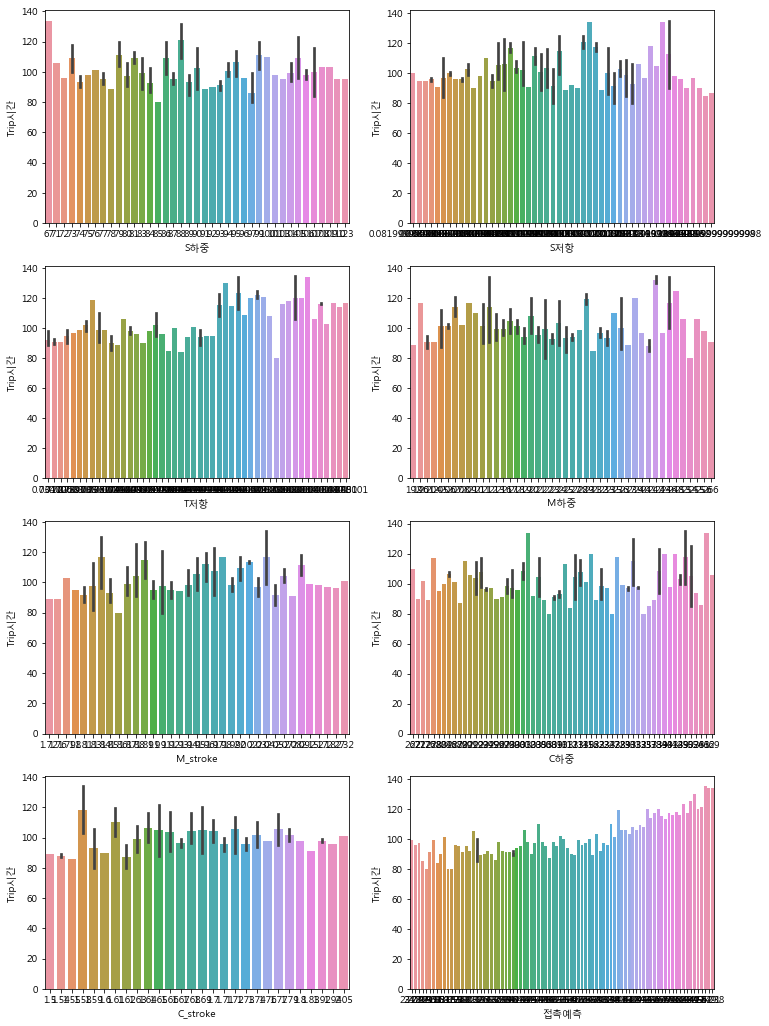

In [43]:
figure, ((ax1, ax2), 
         (ax3, ax4), 
         (ax5, ax6),
         (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(12, 18)

sns.barplot(data=data_all, x="S하중", y="Trip시간", ax=ax1)
sns.barplot(data=data_all, x="S저항", y="Trip시간", ax=ax2)
sns.barplot(data=data_all, x="T저항", y="Trip시간", ax=ax3)
sns.barplot(data=data_all, x="M하중", y="Trip시간", ax=ax4)
sns.barplot(data=data_all, x="M_stroke", y="Trip시간", ax=ax5)
sns.barplot(data=data_all, x="C하중", y="Trip시간", ax=ax6)
sns.barplot(data=data_all, x="C_stroke", y="Trip시간", ax=ax7)
sns.barplot(data=data_all, x="접촉예측", y="Trip시간", ax=ax8)

In [4]:
X = data_all.drop('Gap', axis=1)
X[:3]

,S하중,S저항,T저항,M하중,M_stroke,C하중,C_stroke,C저항,저항합,초기위치,이동속도,접촉예측,Trip시간
0,123,0.084,0.756,218,1.95,323,1.70,1.0613,0.840,8.186,0.0473,34.17,95
1,103,0.083,0.785,216,1.96,298,1.73,1.0578,0.868,8.145,0.0299,31.62,95
2,104,0.092,0.735,218,1.85,298,1.59,1.1678,0.827,8.157,0.0369,34.39,106


In [5]:
y = data_all['Gap']
y[:3]

0    1.598
1    1.396
2    1.552
Name: Gap, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
np.random.seed(7)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 랜덤 포레스트

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
rfc = RandomForestRegressor(n_estimators=300)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9234396661427251

## ##

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
cross_val_score(rfc, X_train, y_train, cv=5).mean()

0.9569062209692584

#### columns 명 바꾸는 방법??

In [12]:
pred = pd.DataFrame(y_test)
pred[:5]

,Gap
13,1.193
45,1.527
17,1.501
20,1.617
12,1.836


In [22]:
pred['y_RF'] =rfc.predict(X_test)
pred[:]

,Gap,y_RF,diff
13,1.193,1.297993,0.104993
45,1.527,1.530403,0.003403
17,1.501,1.455493,0.045507
20,1.617,1.643337,0.026337
12,1.836,1.806067,0.029933
40,1.755,1.743747,0.011253
11,1.801,1.752563,0.048437
82,2.466,2.303677,0.162323
85,2.221,2.224970,0.003970
74,2.228,2.079250,0.148750


In [14]:
# pred = pd.DataFrame([y_rf_pred, y_test], index=['y_test', 'y_rf_pred']).T
# pred[:5]

In [15]:
# plt.figure(figsize=(16,8))
# plt.plot(pred_g)

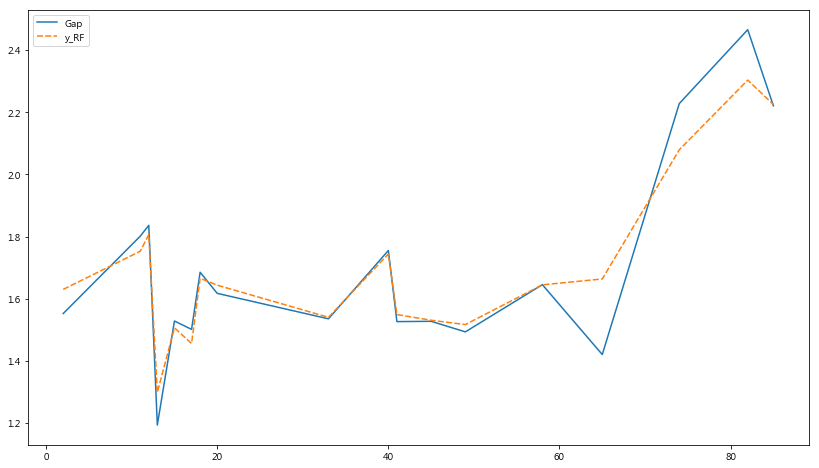

In [36]:
plt.figure(figsize=(14,8))
sns.lineplot(data=pred.drop('diff', axis=1))

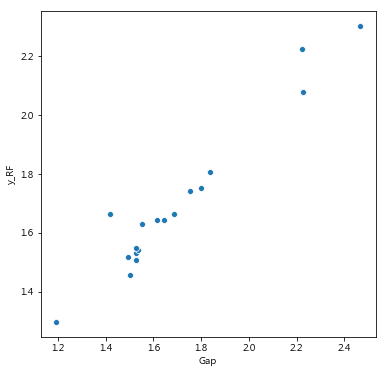

In [18]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=pred, x='Gap', y='y_RF')

In [27]:
pred['diff'] = abs(pred['Gap']-pred['y_RF'])

In [28]:
diff_max = pred['diff'].max()
diff_mean = pred['diff'].mean()
print(f'최대 : {diff_max:.3f}')
print(f'평균 : {diff_mean:.3f}')

최대 : 0.243
평균 : 0.056


In [29]:
pred[['diff']].describe()

,diff
count,18.000000
mean,0.055509
std,0.067475
min,0.000570
25%,0.013337
50%,0.024895
75%,0.070349
max,0.243337


## SVM

In [20]:
np.random.seed(7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
from sklearn.svm import SVR

In [22]:
svr = SVR(kernel="linear")
# , C=float("inf")
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.7470953572550271

## 선형

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
np.random.seed(7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
linr = LinearRegression()
linr.fit(X_train, y_train)
linr.score(X_test, y_test)

0.7963768193245561

In [26]:
pred['y_svr'] = svr.predict(X_test)
pred['y_linr'] = linr.predict(X_test)

pred[:5]

,Trip시간,y_RF,diff,y_svr,y_linr
13,96,95.910000,0.090000,81.132819,87.448304
45,98,93.406667,4.593333,93.835637,92.974358
17,96,91.450000,4.550000,91.801019,92.115086
20,97,93.200000,3.800000,94.684973,97.587621
12,106,109.803333,3.803333,106.100853,106.323106


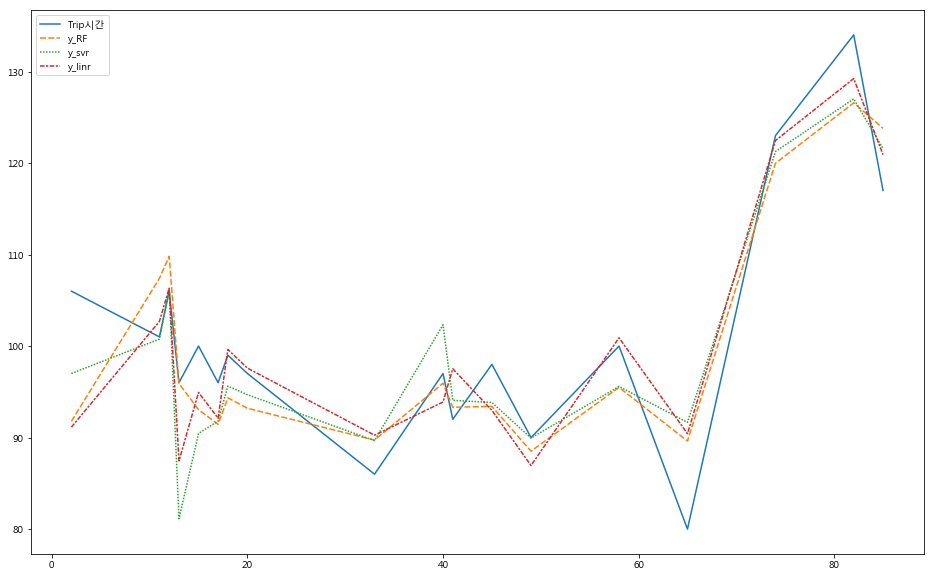

In [27]:
plt.figure(figsize=(16,10))
sns.lineplot(data=pred.drop('diff', axis=1))

### 스케일링

In [28]:
from sklearn.preprocessing import  MinMaxScaler

In [29]:
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)
# y_sc = scaler.fit_transform(y.values.reshape(-1,1)).ravel()

# y도 스케일링이 필요한가?? => ㄴㄴ y는 독립이므로 안해도됨

In [50]:
pd.DataFrame(X_sc[:3].round(4), columns=X.columns)

,S하중,S저항,T저항,M하중,M_stroke,C하중,C_stroke,C저항,저항합,Gap,초기위치,이동속도,접촉예측
0,1.0000,0.1782,0.3262,0.3514,0.3833,0.5701,0.3636,0.2653,0.1346,0.3465,0.5955,0.6883,0.3541
1,0.6429,0.1683,0.5319,0.3243,0.4000,0.3364,0.4182,0.2558,0.3141,0.1960,0.5407,0.1234,0.2726
2,0.6607,0.2574,0.1773,0.3514,0.2167,0.3364,0.1636,0.5539,0.0513,0.3122,0.5567,0.3506,0.3611


In [31]:
np.random.seed(7)
X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2)

In [32]:
## RF

In [33]:
rfc_sc = RandomForestRegressor(n_estimators=300)
rfc_sc.fit(X_sc_train, y_train)
rfc_sc.score(X_sc_test, y_test)

0.7795267932489451

In [34]:
## SVM

In [35]:
svr_sc = SVR(kernel="linear")
svr_sc.fit(X_sc_train, y_train)
svr_sc.score(X_sc_test, y_test)

0.4562158230579459

In [36]:
## Linear

In [38]:
linr_sc = LinearRegression()
linr_sc.fit(X_sc_train, y_train)
linr_sc.score(X_sc_test, y_test)

0.7980676535647965

In [39]:
pred_sc = pd.DataFrame(y_test)

In [40]:
pred_sc['y_rfc_sc'] = rfc_sc.predict(X_sc_test)
pred_sc['y_svr_sc'] = svr_sc.predict(X_sc_test)
pred_sc['y_linr_sc'] = linr_sc.predict(X_sc_test)
pred_sc[:5]

,Trip시간,y_rfc_sc,y_svr_sc,y_linr_sc
13,96,95.890000,94.721956,87.617188
45,98,93.426667,94.697347,93.019531
17,96,91.406667,94.171031,92.105469
20,97,93.200000,94.850825,97.691406
12,106,109.876667,98.382968,106.398438


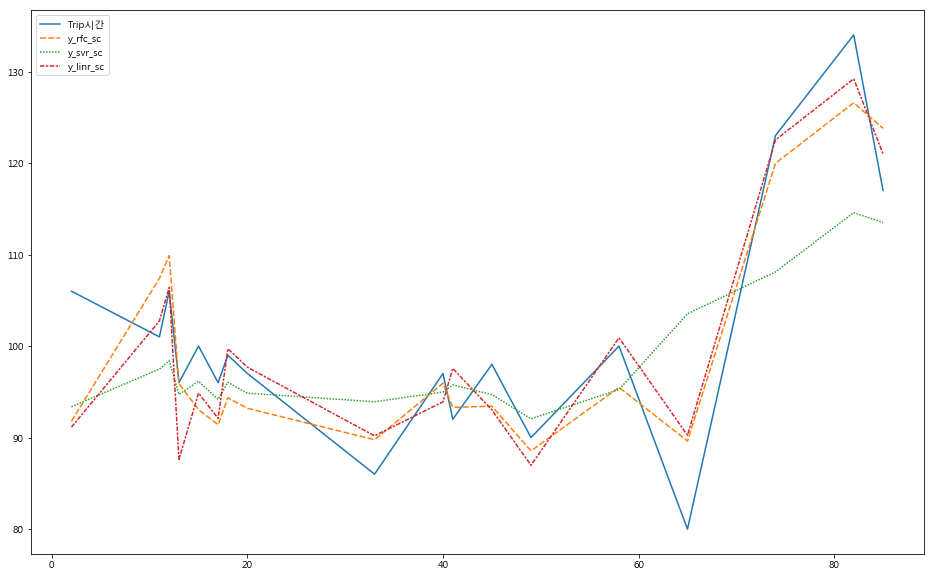

In [41]:
plt.figure(figsize=(16,10))
sns.lineplot(data=pred_sc)

In [ ]:
# scaler.inverse_transform(svr.predict(X_test).reshape(-1,1))

In [ ]:
# pred['y_svr'] = svr.predict(X_test)
# # pred['y_svr_sc'] = svr.predict(X_sc_test)
# pred['y_linr'] = linr.predict(X_test)
# # pred['y_linr'] = scaler.inverse_transform(linr.predict(pred['y_linr'].values.reshape(-1,1)))
# # pred['y_linr_sc'] = linr.predict(X_sc_test)

# pred[:5]